This quick notebook is to figure out if there is a correlation between hiking pole price & weight, using data from UltraLight Outdoor Gear's website.

In [1]:
import requests
import lxml
from bs4 import BeautifulSoup

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
from scipy import stats
import pandas as pd

In [75]:
import re
from itertools import chain

In [148]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (10, 8)

In [3]:
%notebook inline

In [85]:
r = requests.get('https://www.ultralightoutdoorgear.co.uk/equipment-c3/trekking-poles-c67/all-trekking-poles-c168')


In [86]:
with open('cache.html', 'w') as f:
    f.write(r.text)

In [87]:
with open("cache.html") as fp:
    soup = BeautifulSoup(fp)

In [152]:
soup.find(class_='search-results-products__list').find_all(class_="product")[0]

<div class="product product--0 parent_product_id_8958" data-infid="8958_175762" data-productid="" data-productreference="SS16A103" id="product_8958_33368">
<div class="product__image">
<a class="infclick" href="/equipment-c3/trekking-poles-c67/all-trekking-poles-c168/mountain-king-carbon-skyrunner-running-poles-p8958" target="_top" title="Carbon Skyrunner Running Poles">
<img alt="Carbon Skyrunner Running Poles" class="lazyload" data-sizes="(max-width: 768px) 40vw, (max-width: 1024px) 30vw, (max-width: 1056px) calc(((81.25vw - 1rem) - (10px + (1rem * 4))) / 4), (max-width: 1440px) calc(((81.25vw - 4rem) - (10px + (1rem * 4))) / 4), (max-width: 1504px) calc((((1440px - 4rem) / 100 * 81.25 - 10px) - (1rem * 4)) / 4), calc(((1440px / 100 * 81.25 - 10px) - (1rem * 4)) / 4)" data-src="/images/products/thumbnails/1581341532-31023000.jpg" data-srcset="/images/products/thumbnails/1581341532-31023000.jpg 371w, /images/products/medium/1581341531-95584700.jpg 665w" height="371" onload="typeof win

In [133]:
# scrape the list of products and extract info
results = []
products = soup.find(class_='search-results-products__list').find_all(class_="product")
for prod in products:
    name = prod.find_all('a', class_='infclick')[0].attrs['title']
    
    weight_txt = prod.find('div', class_="product__weight").text
    m = re.search(r'([0-9]+)g', weight_txt)
    weight = float(m.group(1))
    
    price_txt = prod.find('span', class_='product-content__price--inc').text
    price = float(price_txt.lstrip("£"))

    # skip already stored products
    if any(r['name'] == name for r in results):
        continue
    
    this_result = {
        'name': name,
        'weight': weight,
        'price': price
    }
    results.append(this_result)

In [89]:
results

[{'name': 'Carbon Skyrunner Running Poles', 'weight': 120.0, 'price': 114.99},
 {'name': 'Trail Blaze Poles', 'weight': 134.0, 'price': 84.99},
 {'name': 'Distance Carbon Z Trekking Poles',
  'weight': 148.0,
  'price': 119.99},
 {'name': 'Compact Carbon Ultra Evo Running Poles',
  'weight': 166.0,
  'price': 101.99},
 {'name': 'Compact Trekking Poles', 'weight': 170.0, 'price': 65.99},
 {'name': 'Distance Carbon FLZ Trekking Poles',
  'weight': 172.0,
  'price': 139.99},
 {'name': 'Fastpacker Carbon Trekking Poles', 'weight': 174.0, 'price': 54.99},
 {'name': 'Compact 4 Trekking Poles', 'weight': 174.0, 'price': 69.99},
 {'name': 'Compact Pro Trekking Poles', 'weight': 175.0, 'price': 69.99},
 {'name': 'Passport TL Trekking Poles', 'weight': 178.0, 'price': 129.99},
 {'name': 'Trecime Carbon Trekking Poles', 'weight': 190.0, 'price': 54.99},
 {'name': 'Passport TL120 Trekking Poles', 'weight': 190.0, 'price': 144.99},
 {'name': 'Micro Stick Carbon Trekking Poles',
  'weight': 194.0,
 

In [111]:
df = pd.DataFrame(results)

In [136]:
df['womens'] = df['name'].str.contains('Womens')

In [137]:
df

,name,weight,price,womens
0,Carbon Skyrunner Running Poles,120.0,114.99,False
1,Trail Blaze Poles,134.0,84.99,False
2,Distance Carbon Z Trekking Poles,148.0,119.99,False
3,Compact Carbon Ultra Evo Running Poles,166.0,101.99,False
4,Compact Trekking Poles,170.0,65.99,False
5,Distance Carbon FLZ Trekking Poles,172.0,139.99,False
6,Fastpacker Carbon Trekking Poles,174.0,54.99,False
7,Compact 4 Trekking Poles,174.0,69.99,False
8,Compact Pro Trekking Poles,175.0,69.99,False
9,Passport TL Trekking Poles,178.0,129.99,False


In [138]:
df.dtypes

name       object
weight    float64
price     float64
womens       bool
dtype: object

In [139]:
len(df.index)

24

slope (i.e. g/£): 0.453969    intercept: 144.984331
R-squared: 0.157622     p-value: 0.054738


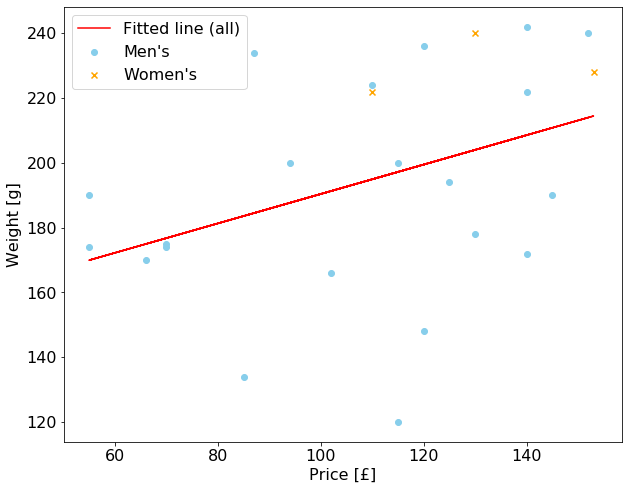

In [156]:
df_mens = df[df['womens'] == False]
df_womens = df[df['womens'] == True]
plt.scatter(df_mens['price'], df_mens['weight'], c='skyblue', marker='o', label="Men's");
plt.scatter(df_womens['price'], df_womens['weight'], c='orange', marker='x', label="Women's");
plt.xlabel('Price [£]')
plt.ylabel('Weight [g]')

# do a basic regression to mens+womens, as no real difference in pattern, and too few womens
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=df['price'], y=df['weight'])
print("slope (i.e. g/£): %f    intercept: %f" % (slope, intercept))
print("R-squared: %f     p-value: %f" % (r_value**2, p_value))
plt.plot(df['price'], intercept + slope*df['price'], 'r', label="Fitted line (all)");
plt.legend();

So there is some very poor evidence for some weak positive correlation: that the **more expensive** poles are actually **heavier**, which is unexpected. Although the correlation is weak, we can at least say a more expensive pole isn't lighter, generally. I guess you're paying for stiffness/durability?

TODO:
 - sort by folding vs non folding
 - sort by fixed length
 - plot by max length?
 - fix scraping (need > 24 results)